# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [185]:
# Importando as bibliotecas e pacotes necessários:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score
%matplotlib inline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [186]:
# Carregando a base de dados
tips = sns.load_dataset(('tips'))

# Criando a variável net_bill:
tips['net_bill'] = (tips['total_bill'] - tips['tip'])
# Calculando a porcentagem da gorjeta em relação ao valor total da conta
tips['tip_pct'] = (tips['tip'] / tips['net_bill'])


tips.head() # mostrando as 5 primeiras linhas do DataFrame

,total_bill,tip,sex,smoker,day,time,size,net_bill,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98,0.172069


In [187]:
# Ajustando o modelo
modelo = smf.ols(formula='tip_pct ~ net_bill', data=tips).fit()

# Imprimindo o resumo do modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Fri, 21 Feb 2025   Prob (F-statistic):           1.52e-06
Time:                        06:56:08   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.0

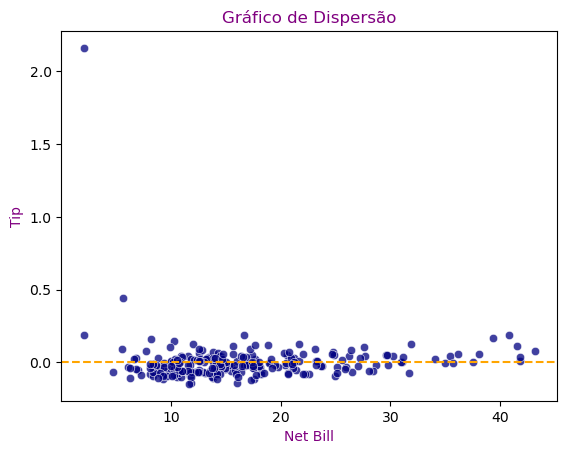

In [188]:
# Criando o gráfico de dispersão
tips['res'] = modelo.resid
sns.scatterplot(x='net_bill', y='res', data=tips, alpha=.75, color = 'navy')
plt.axhline(y=0, color='orange', linestyle='--')
plt.xlabel('Net Bill', color = 'purple')
plt.ylabel('Tip', color ='purple')
plt.title('Gráfico de Dispersão', color = 'purple')
plt.show()

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

In [190]:
# Ajustando o modelo com o logaritmo de net_bill
tips['log_net_bill'] = np.log(tips['net_bill'])
model_log = smf.ols(formula='tip_pct ~ log_net_bill', data=tips)
results_log = model_log.fit()

# Mostrando o resultado
print(results_log.summary())

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Fri, 21 Feb 2025   Prob (F-statistic):           1.62e-13
Time:                        06:56:08   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.6181      0.054     11.444   

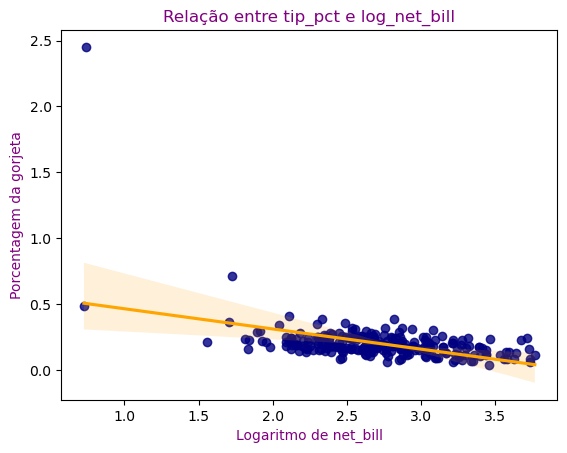

In [191]:
# Fazendo o gráfico
sns.regplot(x='log_net_bill', y='tip_pct', data=tips, line_kws={'color': 'orange'}, scatter_kws={'color': 'navy'})
plt.title('Relação entre tip_pct e log_net_bill', color='purple')
plt.xlabel('Logaritmo de net_bill', color='purple')
plt.ylabel('Porcentagem da gorjeta', color='purple')
plt.show()

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

In [193]:
# Criando as variáveis para o polinômio de segundo grau
tips['net_bill_squared'] = tips['net_bill'] ** 2

# Ajustando o modelo polinomial
model_3 = smf.ols('tip_pct ~ net_bill + net_bill_squared', data=tips).fit()


#Mostrando os resultados
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Fri, 21 Feb 2025   Prob (F-statistic):           1.06e-09
Time:                        06:56:08   Log-Likelihood:                 117.25
No. Observations:                 244   AIC:                            -228.5
Df Residuals:                     241   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.4851      0.047  

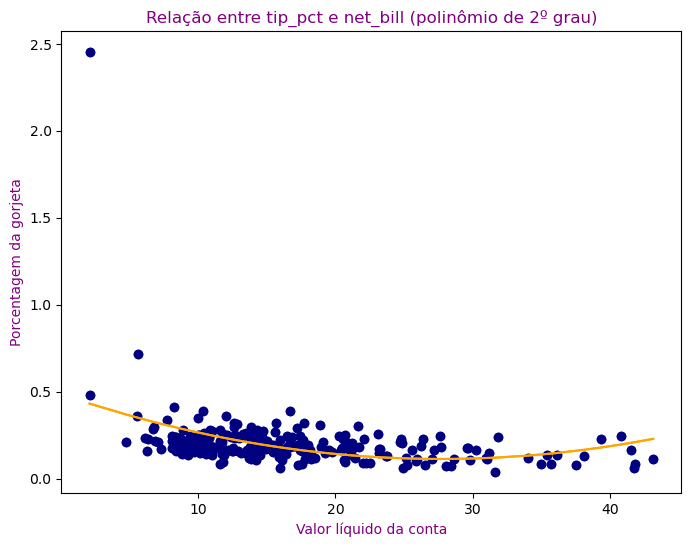

In [194]:
# Criando um modelo polinomial de grau 2
poly = PolynomialFeatures(degree=2)
model_poly = make_pipeline(poly, LinearRegression())

# Treinando o modelo com seus dados
X_train = tips[['net_bill']]  # Features (entrada)
y_train = tips['tip_pct']  # Target (saída)

model_poly.fit(X_train, y_train)  # Ajustando o modelo aos dados


# Criando uma nova coluna para os valores previstos
tips['predicted'] = model_poly.predict(tips[['net_bill']])

# Ordenando os valores para a plotagem
sorted_tips = tips.sort_values(by='net_bill').reset_index(drop=True)

# Criando o gráfico
plt.figure(figsize=(8, 6))
plt.scatter(sorted_tips['net_bill'], sorted_tips['tip_pct'], color='navy', alpha=0.6, label='Dados reais')
plt.plot(sorted_tips['net_bill'], sorted_tips['predicted'], color='orange', label='Ajuste polinomial')

# Fazendo o gráfico
plt.scatter(sorted_tips['net_bill'], sorted_tips['tip_pct'], color='navy')
plt.plot(sorted_tips['net_bill'], sorted_tips['predicted'], color='orange')
plt.title('Relação entre tip_pct e net_bill (polinômio de 2º grau)', color='purple')
plt.xlabel('Valor líquido da conta', color='purple')
plt.ylabel('Porcentagem da gorjeta', color='purple')
plt.show()

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

In [196]:
# Ajustando o modelo com o logaritmo de tip_pct
tips['log_tip_pct'] = np.log(tips['tip_pct'])
model_log_tip_pct = smf.ols(formula='log_tip_pct ~ net_bill', data=tips)
results_log_tip_pct = model_log_tip_pct.fit()
print(results_log_tip_pct.summary())

                            OLS Regression Results                            
Dep. Variable:            log_tip_pct   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Fri, 21 Feb 2025   Prob (F-statistic):           8.27e-16
Time:                        06:56:09   Log-Likelihood:                -106.00
No. Observations:                 244   AIC:                             216.0
Df Residuals:                     242   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2749      0.056    -22.872      0.0

In [197]:
# Calculando o R² em tip_pct
predicted_tip_pct = np.exp(results_log_tip_pct.predict())
r2 = r2_score(tips['tip_pct'], predicted_tip_pct)
print(f"O R² em tip_pct é {r2}")

O R² em tip_pct é 0.08676609740629193


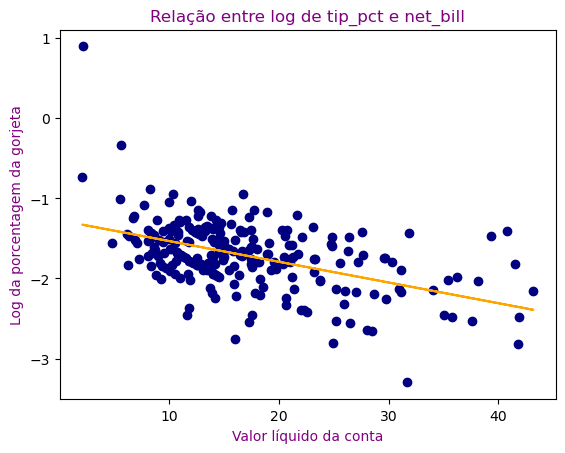

In [198]:
# Fazendo o gráfico
plt.scatter(tips['net_bill'], tips['log_tip_pct'], color='navy')
plt.plot(tips['net_bill'], results_log_tip_pct.predict(), color='orange')
plt.title('Relação entre log de tip_pct e net_bill', color='purple')
plt.xlabel('Valor líquido da conta', color='purple')
plt.ylabel('Log da porcentagem da gorjeta', color='purple')
plt.show()

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

In [200]:
# Ajustando o modelo com o logaritmo de tip_pct e net_bill
model_log_both = smf.ols(formula='log_tip_pct ~ log_net_bill', data=tips)
results_log_both = model_log_both.fit()
print(results_log_both.summary())

                            OLS Regression Results                            
Dep. Variable:            log_tip_pct   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     100.5
Date:                Fri, 21 Feb 2025   Prob (F-statistic):           5.20e-20
Time:                        06:56:09   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.3942      0.133     -2.961   

In [201]:
# Calculando o R² em tip_pct
predicted_tip_pct = np.exp(results_log_both.predict())
r2 = r2_score(tips['tip_pct'], predicted_tip_pct)

print(f"O R² em tip_pct é {r2:.4f}") 

O R² em tip_pct é 0.2277


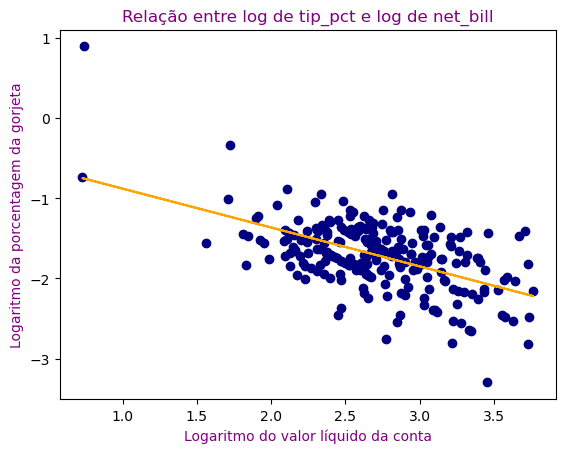

In [202]:
# Fazendo o gráfico
plt.scatter(tips['log_net_bill'], tips['log_tip_pct'], color='navy')
plt.plot(tips['log_net_bill'], results_log_both.predict(), color='orange')
plt.title('Relação entre log de tip_pct e log de net_bill', color='purple')
plt.xlabel('Logaritmo do valor líquido da conta', color='purple')
plt.ylabel('Logaritmo da porcentagem da gorjeta', color='purple')
plt.show()

###  6. qual modelo resultou no melhor ajuste?

In [205]:
# Modelo 1: tip_pct ~ net_bill
tips['pred1'] = modelo.fittedvalues
corr1 = tips[['pred1', 'tip_pct']].corr().iloc[0,1]

# Modelo 2: tip_pct ~ log_net_bill
tips['pred2'] = results_log.fittedvalues
corr2 = tips[['pred2', 'tip_pct']].corr().iloc[0,1]

# Modelo 3: tip_pct ~ net_bill + net_bill_squared
tips['pred3'] = model_3.fittedvalues
corr3 = tips[['pred3', 'tip_pct']].corr().iloc[0,1]

# Modelo 4: log_tip_pct ~ net_bill
tips['pred4'] = np.exp(results_log_tip_pct.fittedvalues)
corr4 = tips[['pred4', 'tip_pct']].corr().iloc[0,1]

# Modelo 5: log_tip_pct ~ log_net_bill
tips['pred5'] = np.exp(results_log_both.fittedvalues)
corr5 = tips[['pred5', 'tip_pct']].corr().iloc[0,1]

print(f"Correlação do Modelo 1: {corr1}")
print(f"Correlação do Modelo 2: {corr2}")
print(f"Correlação do Modelo 3: {corr3}")
print(f"Correlação do Modelo 4: {corr4}")
print(f"Correlação do Modelo 5: {corr5}")

Correlação do Modelo 1: 0.30214375586238673
Correlação do Modelo 2: 0.44914234088544225
Correlação do Modelo 3: 0.3969985482882298
Correlação do Modelo 4: 0.33824530436548217
Correlação do Modelo 5: 0.555831581869205


O Modelo 5 é o modelo mais bem ajustado, pois tem a maior correlação (0,5558).
Isso sugere que tomar a transformação logarítmica de tip_pct e net_bill melhorou mais o ajuste do modelo.